# Collect and check metrics for main models of training jobs from CHTC

for gps study with version v5 using nested_1_x_10_3_x_10 CV

John Curtin & Claire Punturieri  
October 1, 2024

# Housekeeping

## Code Status

Completed for use in GPS study as of 9/2024.

## Notes

In use for both kfold and nested cv, including use of batches

This script aggregates all results/metrics for a batch or batches of jobs that train all model configurations for a specific outcome/label window.

Currently being used to evaluate validation set performance.

# Set Up

## Set Up Environment

### Study parameters

In [ ]:
study <- params$study
version <- params$version
cv <- params$cv
algorithms <- params$algorithms
model <- params$model


### Defaults

In [ ]:

options(conflicts.policy = "depends.ok")

source("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true")

knitr::opts_chunk$set(attr.output='style="max-height: 500px;"')

options(tibble.width = Inf)
options(tibble.print_max = Inf)


### Packages and source

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

ℹ SHA-1 hash of file is "c045eee2655a18dc85e715b78182f176327358a7"

### Paths

In [ ]:

path_input <- format_path(str_c("studydata/risk/chtc/", study))
path_models <- format_path(str_c("studydata/risk/models/", study))
path_output <- format_path(str_c("studydata/risk/chtc/", study))


# Data checking

## Basic checks

Get batch name from above-specified model parameters.

In [ ]:
batch_name <- str_c("train_", algorithms, "_", cv, "_", version, "_", model)


Load in results file.

In [ ]:
results_all <- read_csv(here::here(path_input, batch_name, "output", "batch_results.csv"),
                        show_col_types = FALSE)


Conduct final checks – we expect to see results split evenly among possible hyperparameter combinations, resampling techniques, etc. If these numbers are not even, that suggests there may be a problem.

In [ ]:
  results_all |> tab(outer_split_num) |> print()


# A tibble: 30 × 3
   outer_split_num     n   prop
             <dbl> <int>  <dbl>
 1               1 18480 0.0333
 2               2 18480 0.0333
 3               3 18480 0.0333
 4               4 18480 0.0333
 5               5 18480 0.0333
 6               6 18480 0.0333
 7               7 18480 0.0333
 8               8 18480 0.0333
 9               9 18480 0.0333
10              10 18480 0.0333
11              11 18480 0.0333
12              12 18480 0.0333
13              13 18480 0.0333
14              14 18480 0.0333
15              15 18480 0.0333
16              16 18480 0.0333
17              17 18480 0.0333
18              18 18480 0.0333
19              19 18480 0.0333
20              20 18480 0.0333
21              21 18480 0.0333
22              22 18480 0.0333
23              23 18480 0.0333
24              24 18480 0.0333
25              25 18480 0.0333
26              26 18480 0.0333
27              27 18480 0.0333
28              28 18480 0.0333
29              29 18

# A tibble: 10 × 3
   inner_split_num     n  prop
             <dbl> <int> <dbl>
 1               1 55440   0.1
 2               2 55440   0.1
 3               3 55440   0.1
 4               4 55440   0.1
 5               5 55440   0.1
 6               6 55440   0.1
 7               7 55440   0.1
 8               8 55440   0.1
 9               9 55440   0.1
10              10 55440   0.1

# A tibble: 1 × 3
  algorithm      n  prop
  <chr>      <int> <dbl>
1 xgboost   554400     1

# A tibble: 1 × 3
  feature_set                 n  prop
  <chr>                   <int> <dbl>
1 context_affect_rawdiff 554400     1

# A tibble: 7 × 3
     hp1     n  prop
   <dbl> <int> <dbl>
1 0.0001 79200 0.143
2 0.001  79200 0.143
3 0.01   79200 0.143
4 0.1    79200 0.143
5 0.2    79200 0.143
6 0.3    79200 0.143
7 0.4    79200 0.143

# A tibble: 4 × 3
    hp2      n  prop
  <dbl>  <int> <dbl>
1     1 138600  0.25
2     2 138600  0.25
3     3 138600  0.25
4     4 138600  0.25

# A tibble: 6 × 3
    hp3     n  prop
  <dbl> <int> <dbl>
1    10 92400 0.167
2    15 92400 0.167
3    20 92400 0.167
4    30 92400 0.167
5    40 92400 0.167
6    50 92400 0.167

# A tibble: 11 × 3
   resample     n   prop
   <chr>    <int>  <dbl>
 1 down_1   50400 0.0909
 2 down_2   50400 0.0909
 3 down_3   50400 0.0909
 4 down_4   50400 0.0909
 5 down_5   50400 0.0909
 6 none     50400 0.0909
 7 up_1     50400 0.0909
 8 up_2     50400 0.0909
 9 up_3     50400 0.0909
10 up_4     50400 0.0909
11 up_5     50400 0.0909

Following basic checks, save raw metrics file into the models folder on the server.

In [ ]:
results_all |>
  arrange(split_num, outer_split_num, inner_split_num, algorithm, resample) |> 
  write_csv(here::here(path_models, str_c("inner_metrics_",
                                             version, "_",
                                             cv, "_", model, ".csv")))


## Identify best configuration

Summarize median auROCs by model parameters.

In [ ]:
metrics_avg <- results_all |> 
  group_by(algorithm, feature_set, hp1, hp2, hp3, resample) |> 
   summarize(median_roc_auc = median(roc_auc),
             n_folds = n(), .groups = "drop") |> 
  relocate(n_folds) |> 
  arrange(desc(median_roc_auc)) |> 
  ungroup()


Check to make sure summarized tibble looks accurate.

In [ ]:
metrics_avg |> 
  slice(1:50) |> 
  print_kbl()


Pull out best configuration from metrics_avg and save out results for best configuration into models folder on server.

In [ ]:
best_config <- metrics_avg |> 
  slice(1) |> 
  print()


# A tibble: 1 × 8
  n_folds algorithm feature_set              hp1   hp2   hp3 resample
    <int> <chr>     <chr>                  <dbl> <dbl> <dbl> <chr>   
1     300 xgboost   context_affect_rawdiff  0.01     2    20 up_1    
  median_roc_auc
           <dbl>
1          0.711

## Plot hyperparameters

Ensure that you have assessed a wide enough range of hyperparameters.

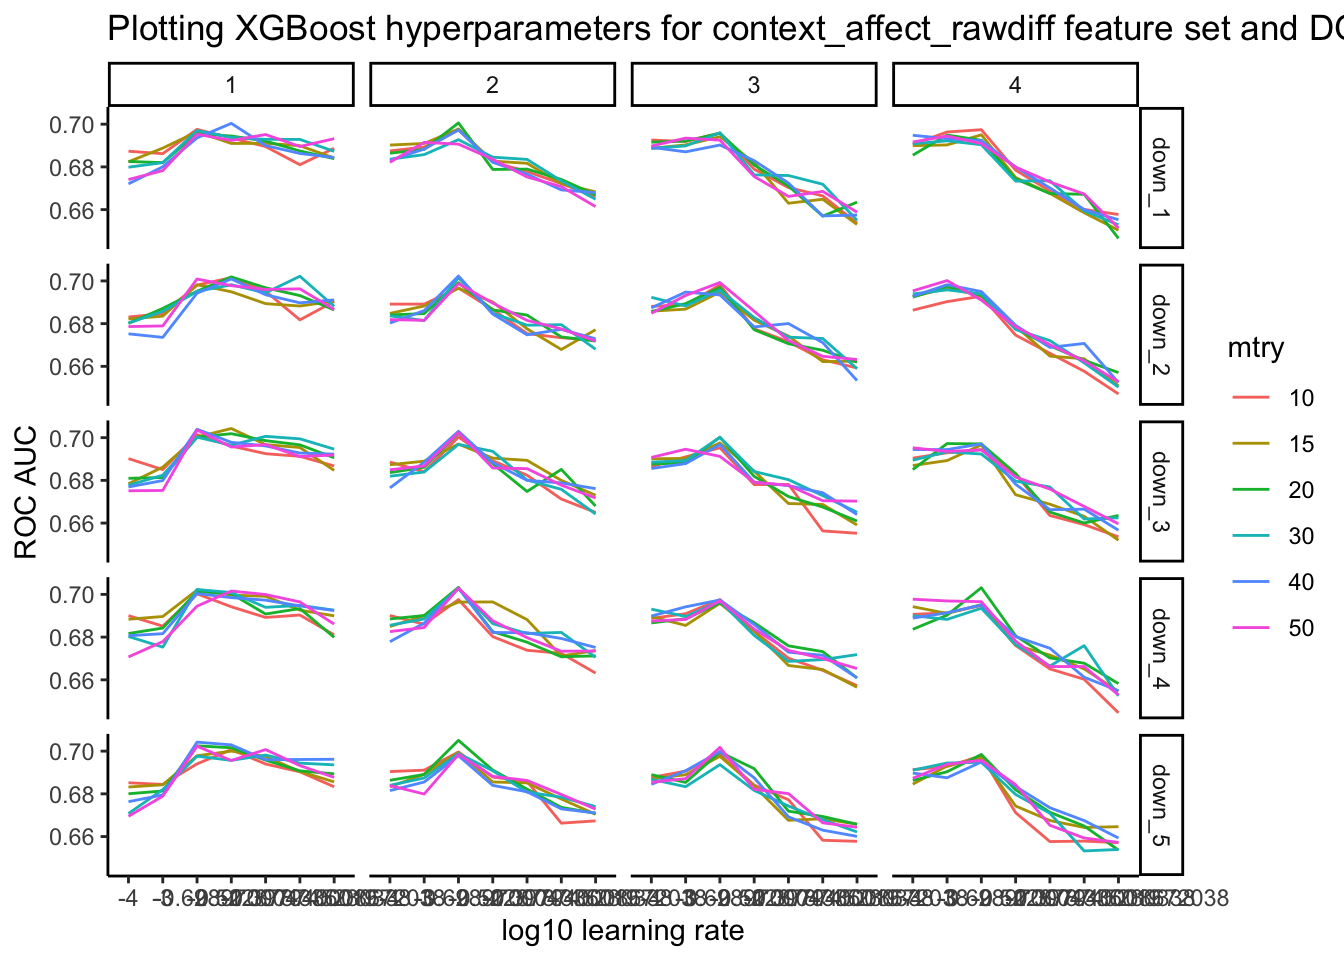

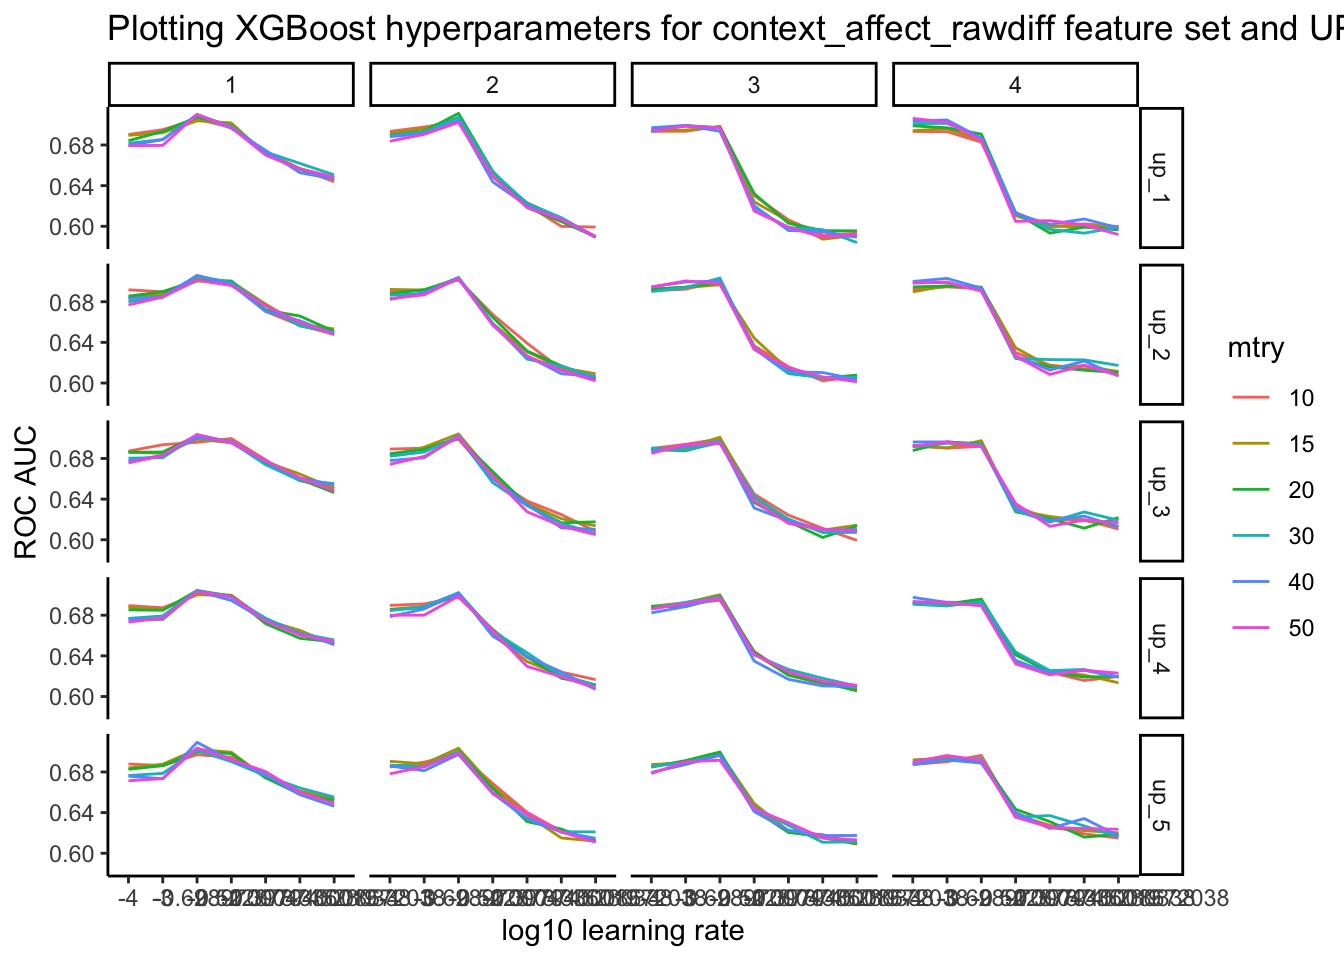

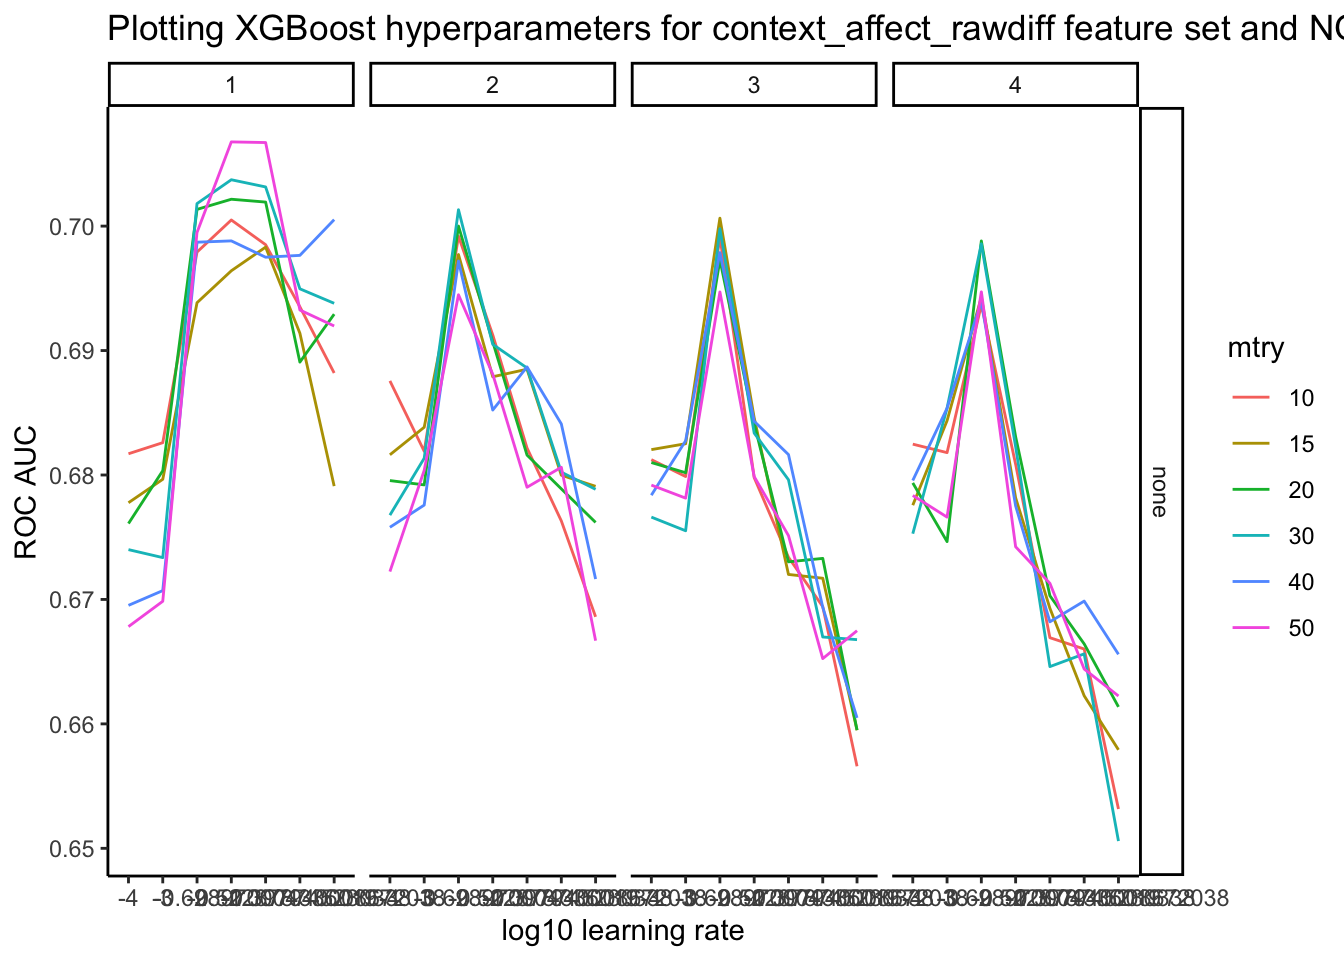

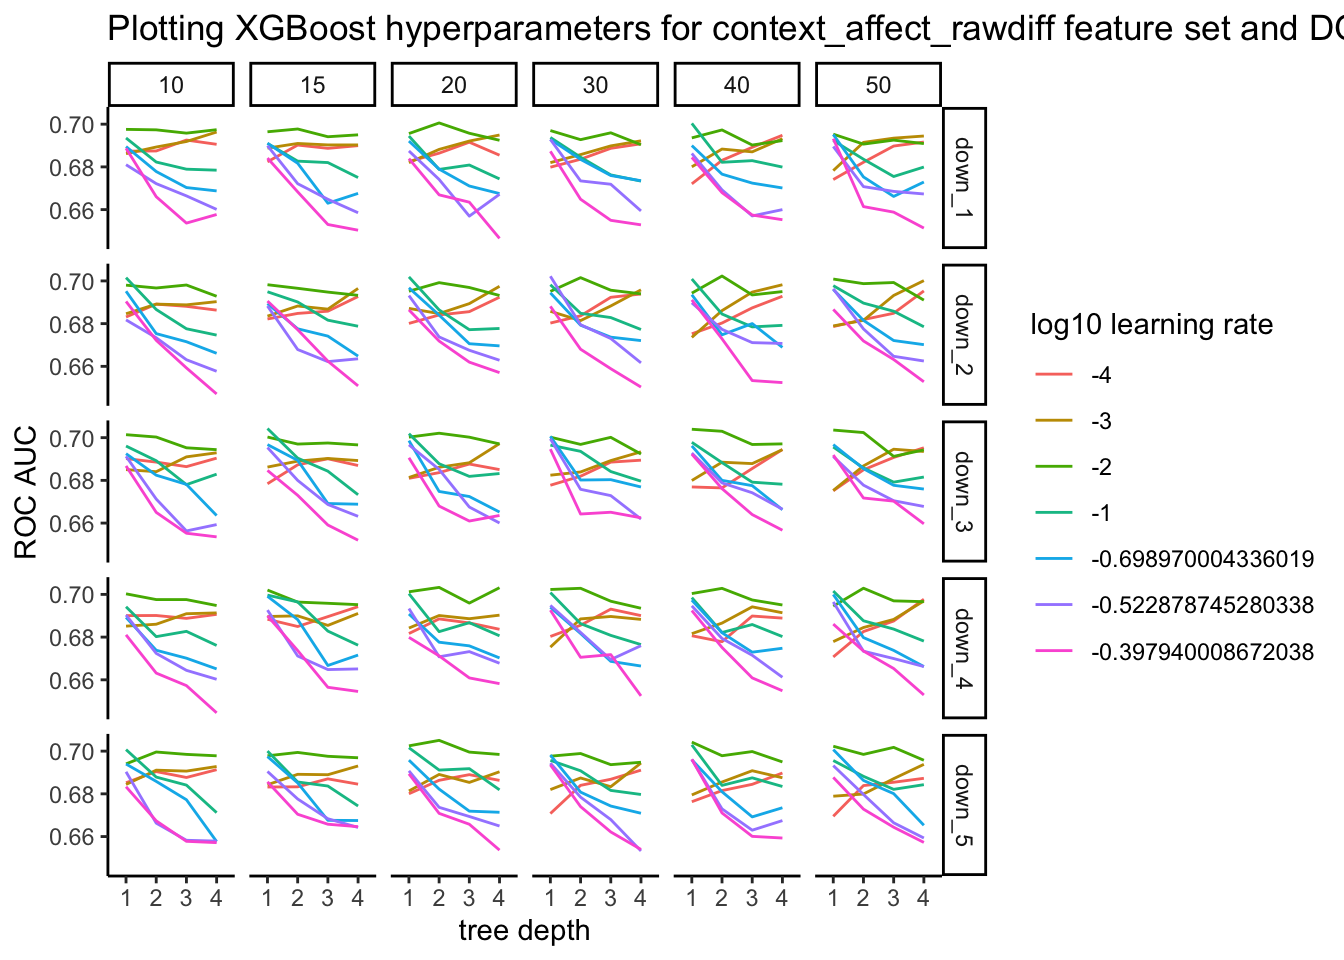

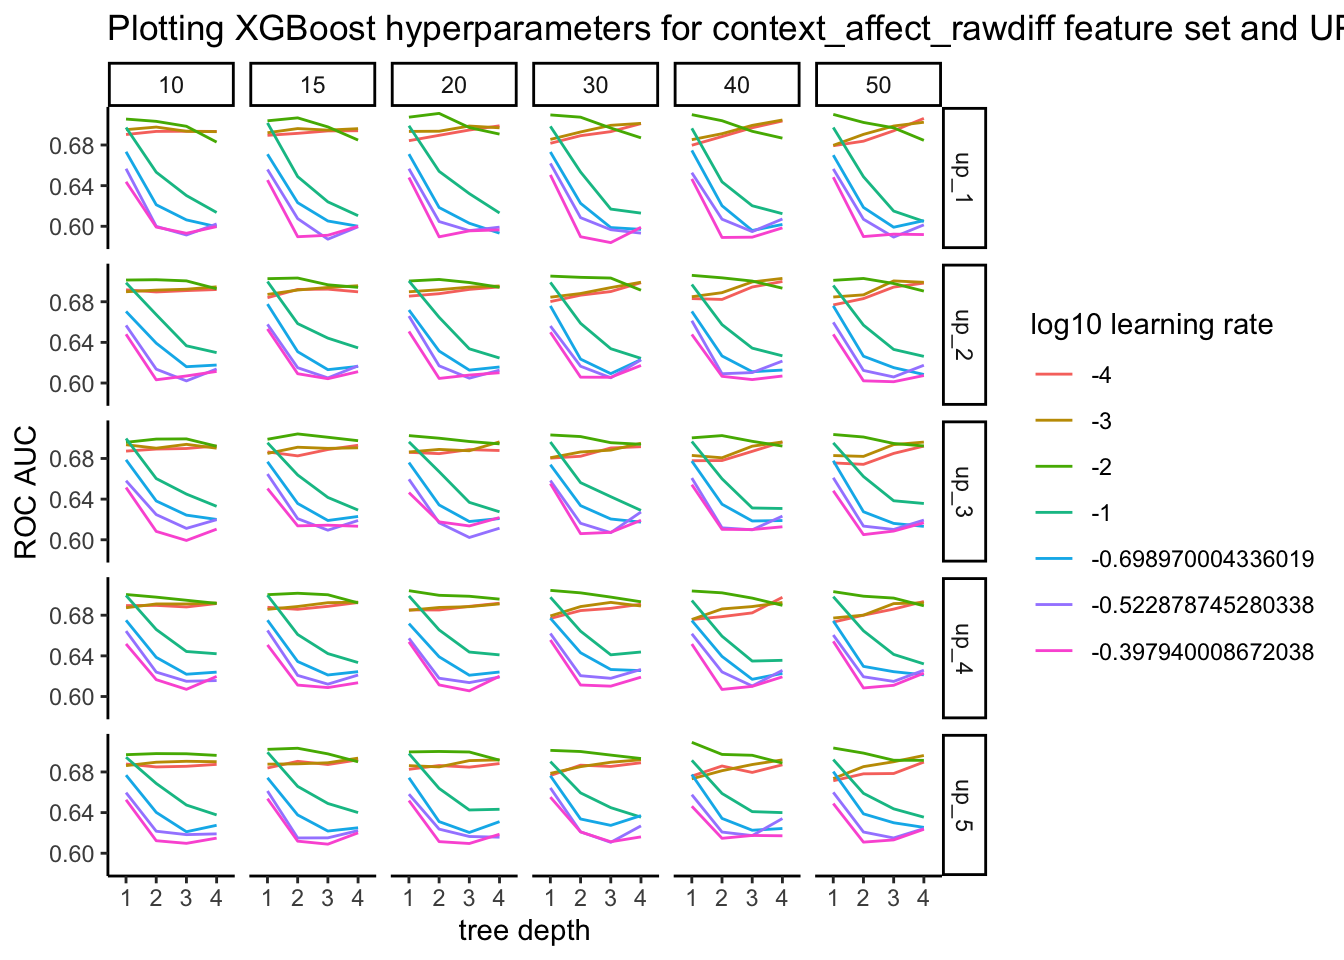

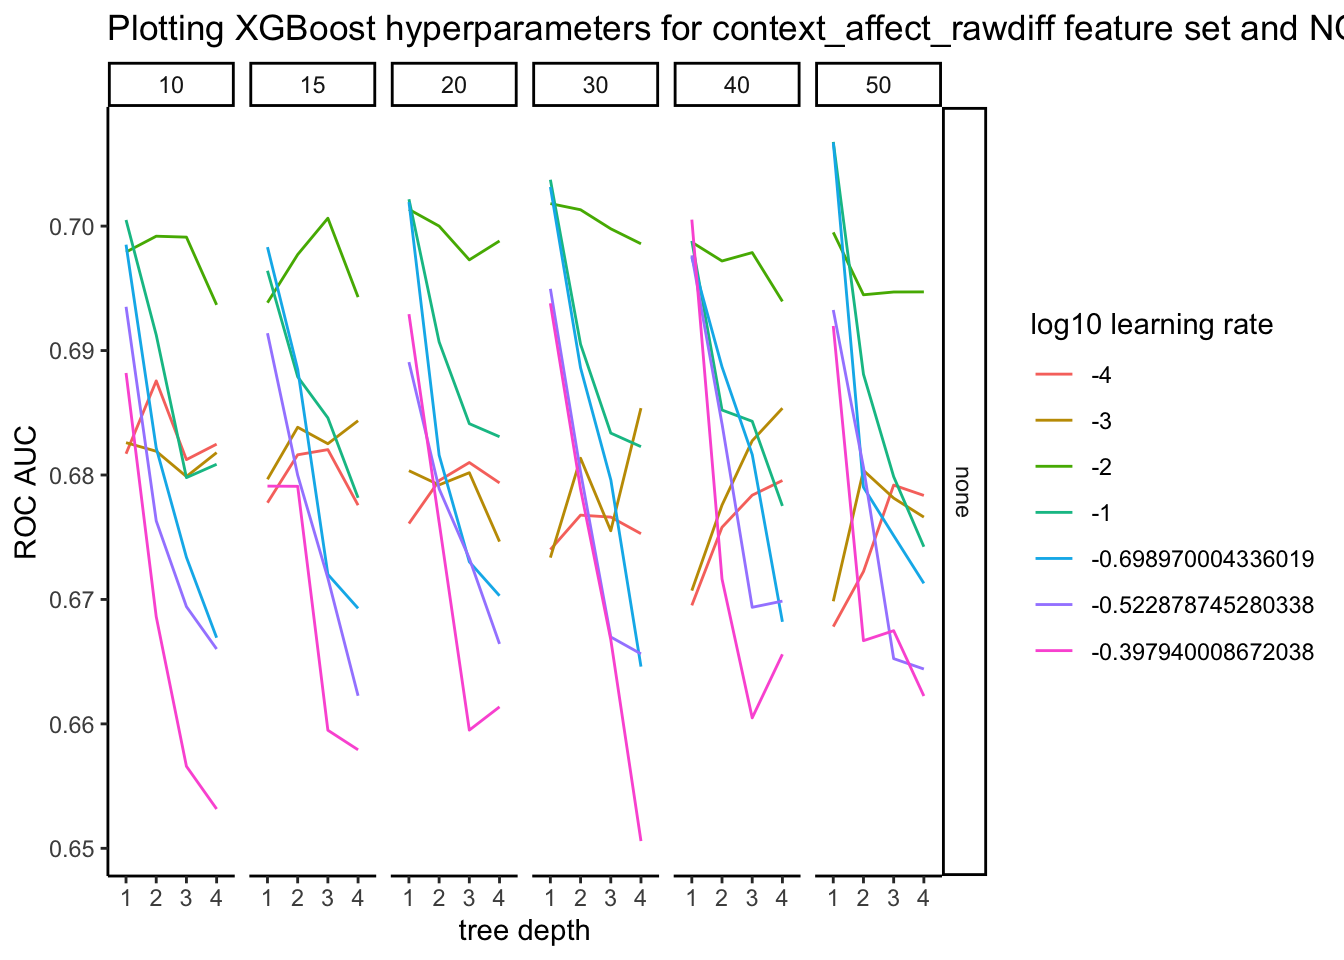

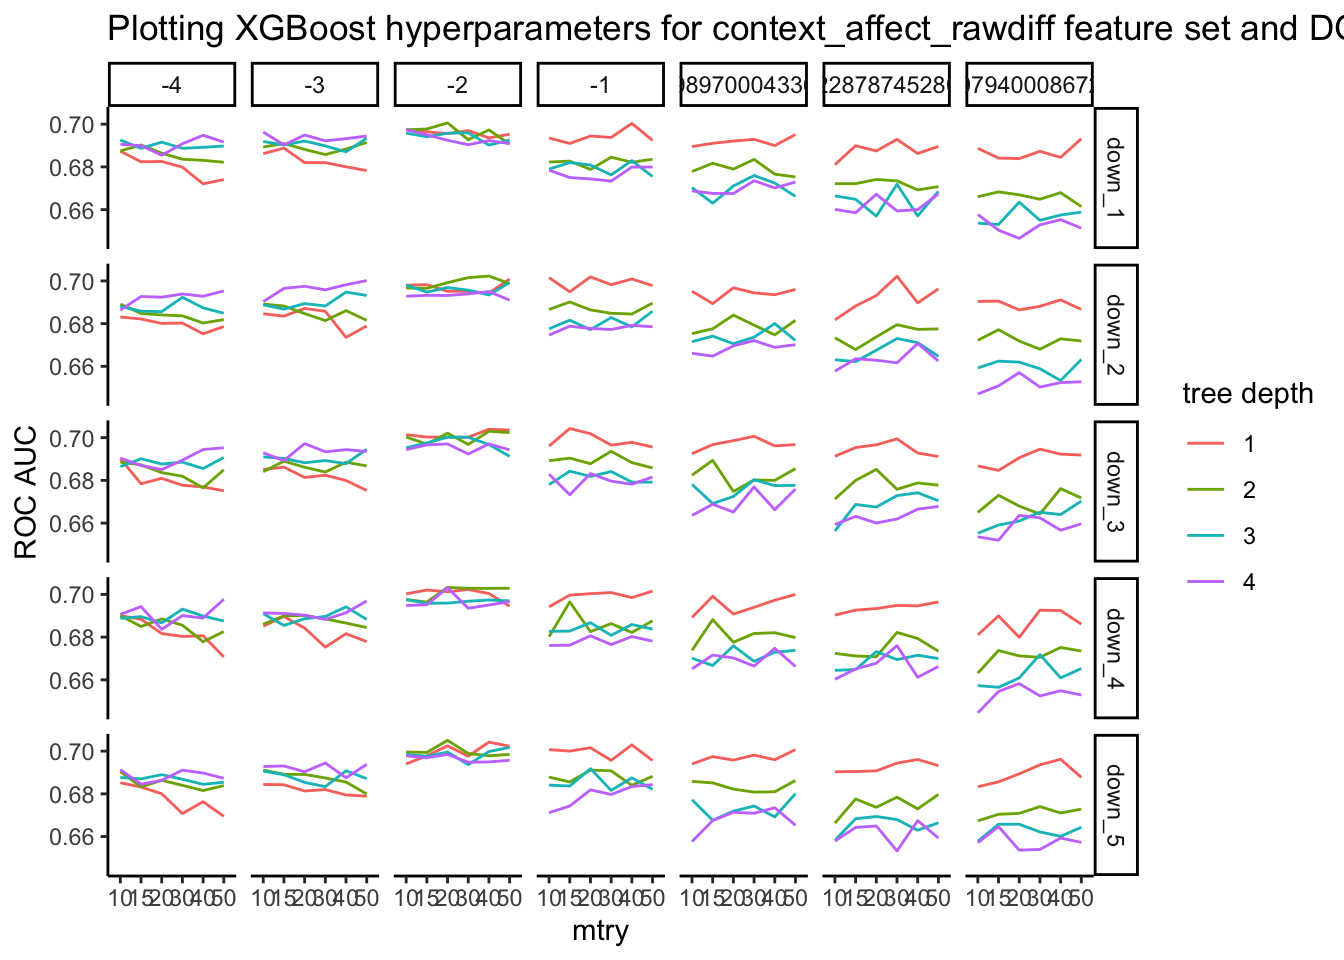

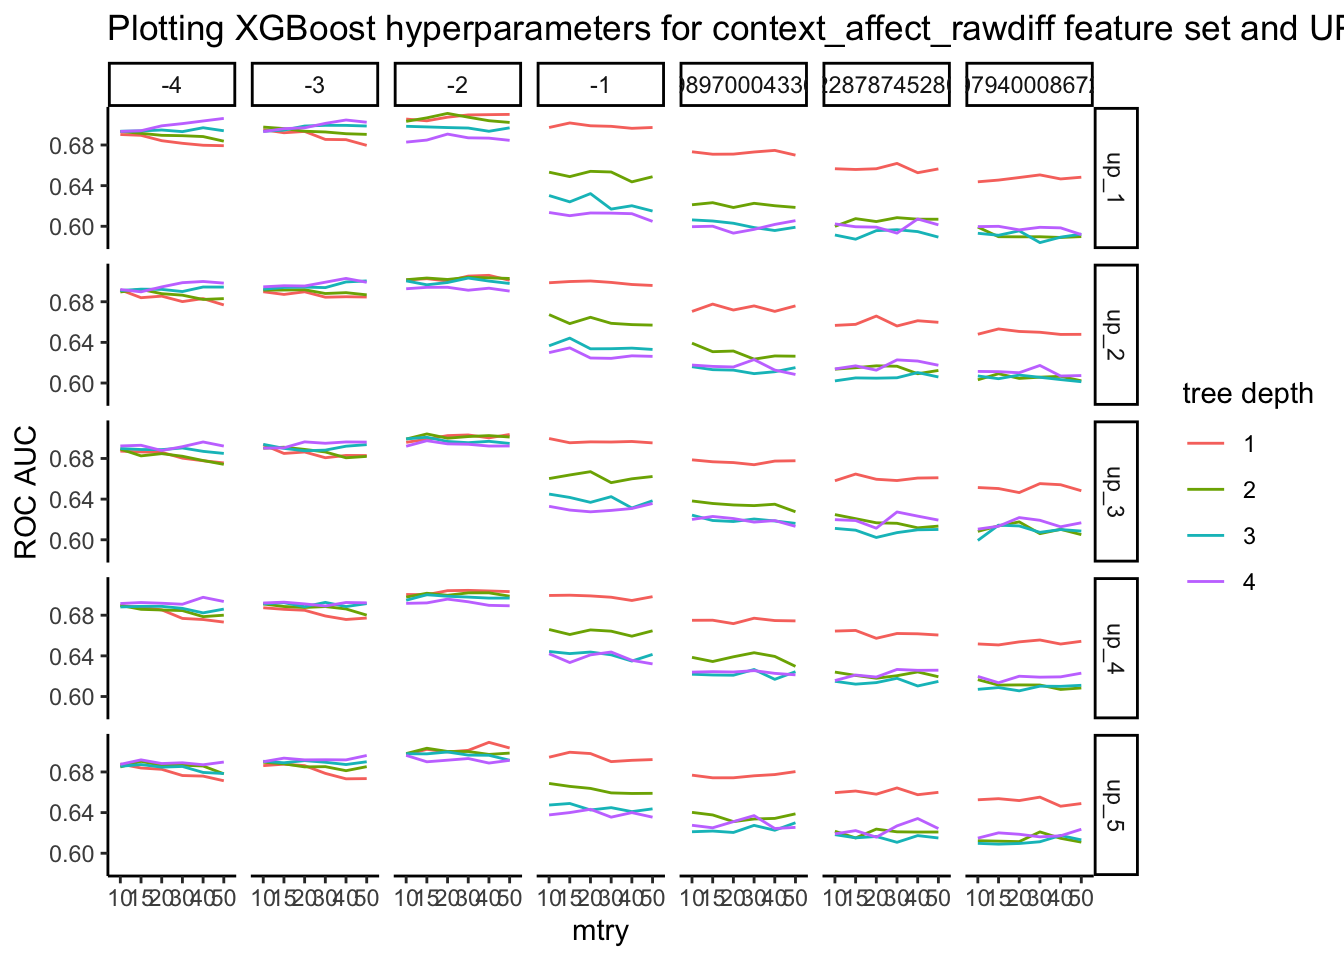

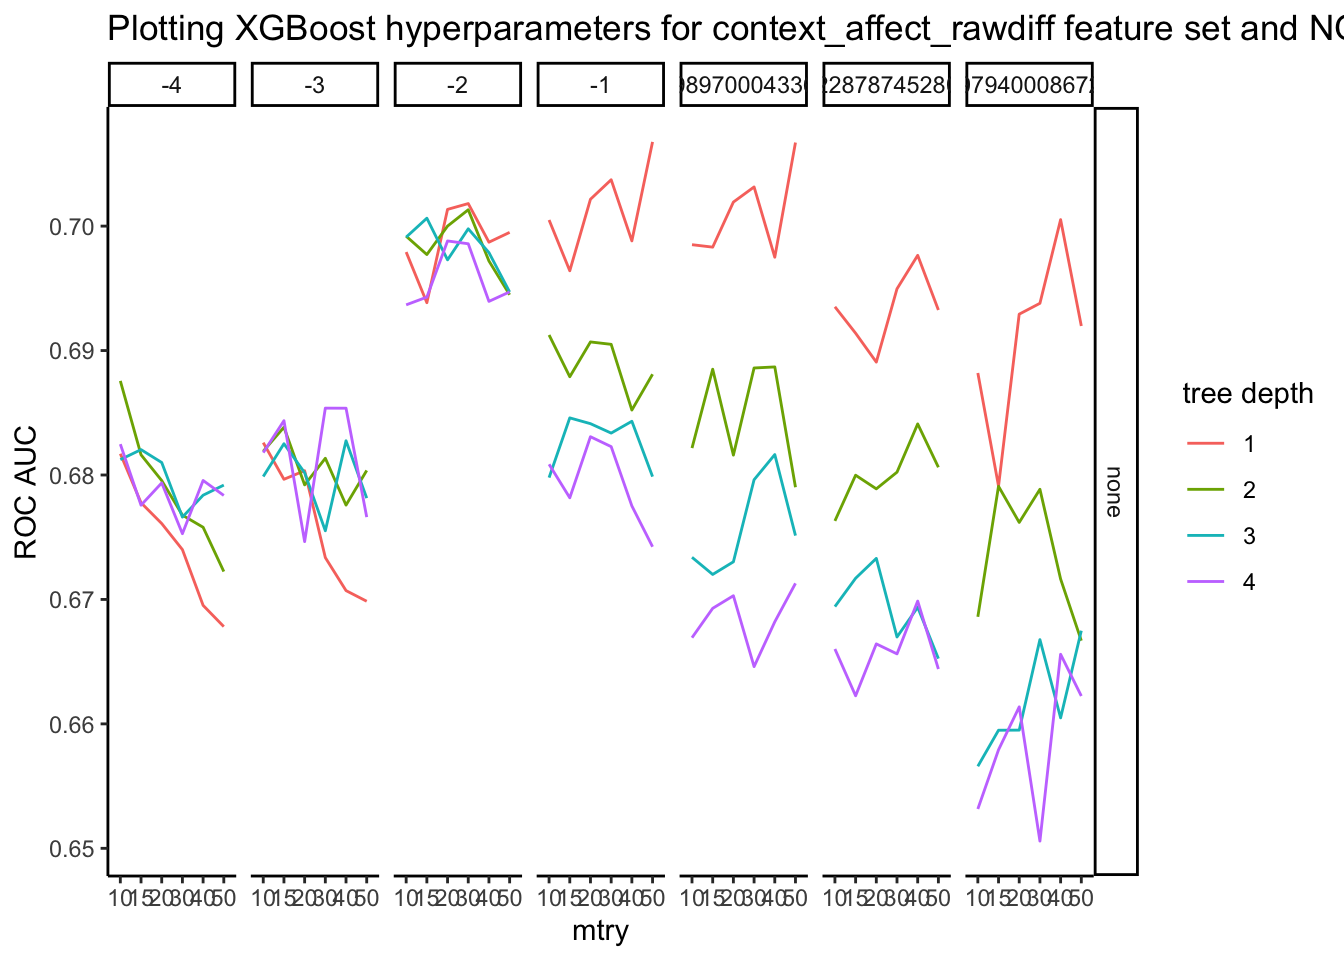

In [ ]:
# update algorithms to actual ones in the tibble
algorithms <- unique(metrics_avg$algorithm) 
feature_sets <- unique(metrics_avg$feature_set) 

for (k in algorithms) {
  
  results_k <- metrics_avg |> 
      filter(algorithm == k)
  
  for (i in feature_sets) {
  
    results_i <- results_k |> 
      filter(feature_set == i)
    
    
    # glmnet
    if (k == "glmnet") {
  
      plot_title <- str_c("Plotting glmnet hyperparameters for ", i, " feature set")
  
  
      plot_i <- results_i |>
        mutate(hp1 = factor(hp1, ordered = TRUE),
               resample = case_when(resample == "none" ~ "none_none",
                                    TRUE ~ resample)) |> 
        separate(resample, c("resample", "under_ratio"), "_") |> 
        mutate(under_ratio = factor(under_ratio)) |> 
        ggplot(mapping = aes(x = log(hp2), 
                         y = roc_auc, 
                         group = hp1, 
                         color = hp1)) +
          geom_line() +
          facet_grid(under_ratio ~ resample) +
          scale_color_discrete(name = "mixture (alpha)") +
          labs(title = plot_title, x = "penalty (lambda)", y = "ROC AUC")
  
      print(plot_i)
    }

    # random forest
    if (k == "random_forest") {
      
      plot_title <- str_c("Plotting RF hyperparameters for ", i, " feature set")
      
      plot_i <- results_i |>
        mutate(hp2 = factor(hp2, ordered = TRUE)) |> 
        separate(resample, c("resample", "under_ratio"), "_") |> 
        mutate(under_ratio = factor(under_ratio)) |> 
        ggplot(mapping = aes(x = hp1, 
                         y = roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(under_ratio ~ resample) +
          scale_color_discrete(name = "min n") +
          labs(title = plot_title, x = "mtry", y = "ROC AUC")
      
       print(plot_i)
    }  
    
    # XGBoost
    if (k == "xgboost") {
      
      # hp1 x axis
            plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and DOWNSAMPLE")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)), # prob have to change this to factor
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "down")) |> 
        ggplot(mapping = aes(x = log_hp1, 
                         y = median_roc_auc, 
                         group = hp3, 
                         color = hp3)) +
          geom_line() +
          facet_grid(resample ~ hp2) +
          scale_color_discrete(name = "mtry") +
          labs(title = plot_title, x = "log10 learning rate", y = "ROC AUC")
      
       print(plot_i)
       
      plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and UPSAMPLE")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)),
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "up")) |> 
        ggplot(mapping = aes(x = log_hp1, 
                         y = median_roc_auc, 
                         group = hp3, 
                         color = hp3)) +
          geom_line() +
          facet_grid(resample ~ hp2) +
          scale_color_discrete(name = "mtry") +
          labs(title = plot_title, x = "log10 learning rate", y = "ROC AUC")
      
       print(plot_i)
       
        plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and NO RESAMPLING")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)),
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "none")) |> 
        ggplot(mapping = aes(x = log_hp1, 
                         y = median_roc_auc, 
                         group = hp3, 
                         color = hp3)) +
          geom_line() +
          facet_grid(resample ~ hp2) +
          scale_color_discrete(name = "mtry") +
          labs(title = plot_title, x = "log10 learning rate", y = "ROC AUC")
      
       print(plot_i)
      
      # hp2 x axis
      
      plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and DOWNSAMPLE")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)), # prob have to change this to factor
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "down")) |> 
        ggplot(mapping = aes(x = hp2, 
                         y = median_roc_auc, 
                         group = log_hp1, 
                         color = log_hp1)) +
          geom_line() +
          facet_grid(resample ~ hp3) +
          scale_color_discrete(name = "log10 learning rate") +
          labs(title = plot_title, x = "tree depth", y = "ROC AUC")
      
       print(plot_i)
       
      plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and UPSAMPLE")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)),
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "up")) |> 
        ggplot(mapping = aes(x = hp2, 
                         y = median_roc_auc, 
                         group = log_hp1, 
                         color = log_hp1)) +
          geom_line() +
          facet_grid(resample ~ hp3) +
          scale_color_discrete(name = "log10 learning rate") +
          labs(title = plot_title, x = "tree depth", y = "ROC AUC")
      
       print(plot_i)
       
        plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and NO RESAMPLING")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)),
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "none")) |> 
        ggplot(mapping = aes(x = hp2, 
                         y = median_roc_auc, 
                         group = log_hp1, 
                         color = log_hp1)) +
          geom_line() +
          facet_grid(resample ~ hp3) +
          scale_color_discrete(name = "log10 learning rate") +
          labs(title = plot_title, x = "tree depth", y = "ROC AUC")
      
       print(plot_i)
       
       # hp3 x axis
    plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and DOWNSAMPLE")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)), # prob have to change this to factor
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "down")) |> 
        ggplot(mapping = aes(x = hp3, 
                         y = median_roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(resample ~ log_hp1) +
          scale_color_discrete(name = "tree depth") +
          labs(title = plot_title, x = "mtry", y = "ROC AUC")
      
       print(plot_i)
       
      plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and UPSAMPLE")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)),
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "up")) |> 
        ggplot(mapping = aes(x = hp3, 
                         y = median_roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(resample ~ log_hp1) +
          scale_color_discrete(name = "tree depth") +
          labs(title = plot_title, x = "mtry", y = "ROC AUC")
      
       print(plot_i)
       
        plot_title <- str_c("Plotting XGBoost hyperparameters for ", i, " feature set and NO RESAMPLING")
      plot_i <- results_i |>
        mutate(log_hp1 = factor(log10(hp1)),
               hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "none")) |> 
        ggplot(mapping = aes(x = hp3, 
                         y = median_roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(resample ~ log_hp1) +
          scale_color_discrete(name = "tree depth") +
          labs(title = plot_title, x = "mtry", y = "ROC AUC")
      
       print(plot_i)
    }  
    
    # rda
    if (k == "rda") {
      
      plot_title <- str_c("Plotting RDA hyperparameters for ", i, " feature set")
      
      plot_i <- results_i |>
        mutate(hp2 = factor(hp2, ordered = TRUE),
               resample = case_when(resample == "none" ~ "none_none",
                                    TRUE ~ resample)) |> 
        separate(resample, c("resample", "under_ratio"), "_") |> 
        mutate(under_ratio = factor(under_ratio)) |> 
        ggplot(mapping = aes(x = hp1, 
                         y = roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(under_ratio ~ resample) +
          scale_color_discrete(name = "frac identity matrix") +
          labs(title = plot_title, x = "frac common cov", y = "ROC AUC")
      
       print(plot_i)
    }  
    
     # nnet
    if (k == "nnet") {
      
      plot_title <- str_c("Plotting nnet hyperparameters for ", i, " feature set and DOWNSAMPLE by HIDDEN UNITS")
      plot_i <- results_i |>
        mutate(hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "down")) |> 
        ggplot(mapping = aes(x = hp1, 
                         y = roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(resample ~ hp3) +
          scale_color_discrete(name = "penalty") +
          labs(title = plot_title, x = "epochs", y = "ROC AUC")
      
       print(plot_i)
       
      plot_title <- str_c("Plotting nnet hyperparameters for ", i, " feature set and UPSAMPLE by HIDDEN UNITS")
      plot_i <- results_i |>
        mutate(hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "down")) |> 
        ggplot(mapping = aes(x = hp1, 
                         y = roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(resample ~ hp3) +
          scale_color_discrete(name = "penalty") +
          labs(title = plot_title, x = "epochs", y = "ROC AUC")
      
       print(plot_i)
  
    
    plot_title <- str_c("Plotting nnet hyperparameters for ", i, " feature set and NO RESAMPLING by HIDDEN UNITS")
      plot_i <- results_i |>
        mutate(hp2 = factor(hp2, ordered = TRUE),
               hp3 = factor(hp3, ordered = TRUE),
               resample = factor(resample)) |> 
        filter(str_detect(resample, "none")) |> 
        ggplot(mapping = aes(x = hp1, 
                         y = roc_auc, 
                         group = hp2, 
                         color = hp2)) +
          geom_line() +
          facet_grid(resample ~ hp3) +
          scale_color_discrete(name = "penalty") +
          labs(title = plot_title, x = "epochs", y = "ROC AUC")
      
       print(plot_i)
    } 
  }
}
